# <span style = "color: green" >Gold Price Prediction </span>

***

#### Import the necessary libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns


#### Read 'gold_price_usd.csv' & store it in a variable

In [2]:
df=pd.read_csv('gold_price_usd.csv')
df

,Date,USD (AM)
0,2001-01-02,272.80
1,2001-01-03,269.00
2,2001-01-04,268.75
3,2001-01-05,268.00
4,2001-01-08,268.60
...,...,...
4713,2019-08-27,1531.85
4714,2019-08-28,1541.75
4715,2019-08-29,1536.65
4716,2019-08-30,1526.55



#### View the first 5 rows

In [3]:
df.head()

,Date,USD (AM)
0,2001-01-02,272.80
1,2001-01-03,269.00
2,2001-01-04,268.75
3,2001-01-05,268.00
4,2001-01-08,268.60


#### Check the information

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4718 entries, 0 to 4717
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Date      4718 non-null   object 
 1   USD (AM)  4718 non-null   float64
dtypes: float64(1), object(1)
memory usage: 73.8+ KB


#### Find the columns

In [5]:
df.columns

Index(['Date', 'USD (AM)'], dtype='object')

#### Rename USD (AM) to Price

In [6]:
df['Price']=df['USD (AM)']
df.drop(columns='USD (AM)',inplace=True)
df.head()

,Date,Price
0,2001-01-02,272.80
1,2001-01-03,269.00
2,2001-01-04,268.75
3,2001-01-05,268.00
4,2001-01-08,268.60


In [7]:
df['Date']=pd.to_datetime(df['Date'])

In [8]:
df['Year']=df['Date'].dt.year
df['Months']=df['Date'].dt.month

In [9]:
df.head()

,Date,Price,Year,Months
0,2001-01-02,272.80,2001,1
1,2001-01-03,269.00,2001,1
2,2001-01-04,268.75,2001,1
3,2001-01-05,268.00,2001,1
4,2001-01-08,268.60,2001,1


In [ ]:
df['Year']=df['Date'].apply(Year)
df['Months']=df['Date'].apply(month)
df.head()


In [61]:
def month(x):
    a=x.split('-')[1]
    return a
def Year(s):
    d=s.split('-')[0]
    return d

In [37]:
df

,Date,Price,Year,Months
0,2001-01-02,272.80,2001,01
1,2001-01-03,269.00,2001,01
2,2001-01-04,268.75,2001,01
3,2001-01-05,268.00,2001,01
4,2001-01-08,268.60,2001,01
...,...,...,...,...
4713,2019-08-27,1531.85,2019,08
4714,2019-08-28,1541.75,2019,08
4715,2019-08-29,1536.65,2019,08
4716,2019-08-30,1526.55,2019,08


#### Check if there are any missing values in the dataset

In [10]:
df.isnull().sum()

Date      0
Price     0
Year      0
Months    0
dtype: int64

#### Gather the basic statistical information about the dataset

In [11]:
df.describe()


,Price,Year,Months
count,4718.000000,4718.000000,4718.000000
mean,959.990812,2009.839339,6.456761
std,449.456217,5.392467,3.426217
min,256.700000,2001.000000,1.000000
25%,449.112500,2005.000000,3.000000
50%,1113.125000,2010.000000,6.000000
75%,1293.750000,2014.750000,9.000000
max,1896.500000,2019.000000,12.000000


#### Convert Date column from object to datetime format

In [12]:
df['Date']=pd.to_datetime(df['Date'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4718 entries, 0 to 4717
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    4718 non-null   datetime64[ns]
 1   Price   4718 non-null   float64       
 2   Year    4718 non-null   int64         
 3   Months  4718 non-null   int64         
dtypes: datetime64[ns](1), float64(1), int64(2)
memory usage: 147.6 KB


#### Create a new column with Year

In [13]:
df.head()

,Date,Price,Year,Months
0,2001-01-02,272.80,2001,1
1,2001-01-03,269.00,2001,1
2,2001-01-04,268.75,2001,1
3,2001-01-05,268.00,2001,1
4,2001-01-08,268.60,2001,1


#### Create a new column with Months

In [14]:
df.head()

,Date,Price,Year,Months
0,2001-01-02,272.80,2001,1
1,2001-01-03,269.00,2001,1
2,2001-01-04,268.75,2001,1
3,2001-01-05,268.00,2001,1
4,2001-01-08,268.60,2001,1


#### See all the years and Months in our dataset

In [15]:
df['Year'].unique()

array([2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011,
       2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019], dtype=int64)

In [15]:
df['Months'].unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12], dtype=int64)

# <span style = "color: orange" >Visualization</span>

### Create a regression plot with x-axis as years and y-axis as Price

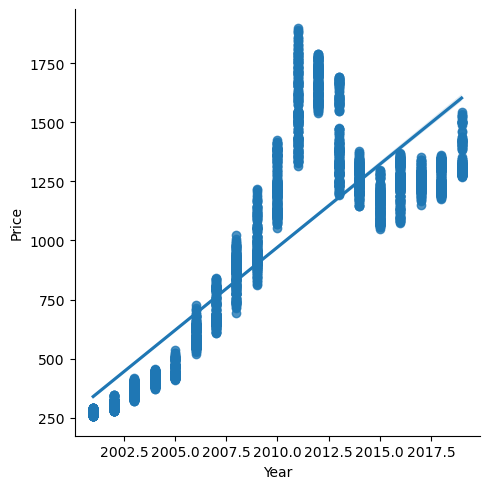

In [16]:

sns.lmplot(x='Year',y='Price',data=df)

### Plot a histplot to find the variation in price

<Axes: xlabel='Price', ylabel='Count'>

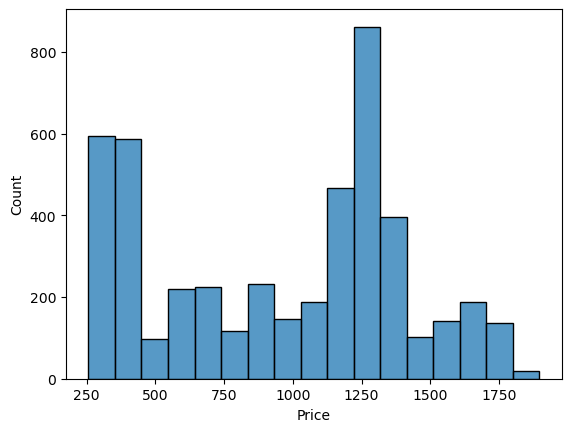

In [17]:
sns.histplot(df['Price'])

### Assign year and price in x and y variables

In [18]:
X = df[['Year']]
y = df['Price']

### Split the data into traning and testin set

We will train our model on the training set and then use the test set to evaluate the model

In [19]:
# import train_test split
from sklearn.model_selection import train_test_split

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.3, random_state=100)

## Train Data

In [21]:
from sklearn.linear_model import LinearRegression

### Create Linear Regression Model

In [22]:
model=LinearRegression()

### Train the  model

In [23]:
print(model.fit(X_train,y_train))

LinearRegression()


### Check the score of our model

In [24]:
model.score(X_train,y_train)

0.7048691960223041

### Check the coefficient and Intercept

In [25]:
print(model.intercept_)

-140074.32374779374


In [26]:

print(model.coef_)

[70.17366927]


### Make Prediction with Test data

In [28]:
Y_pred

array([ 553.70946788,  413.36212934, 1185.27249131, ..., 1115.09882204,
        343.18846007, 1536.14083765])

In [29]:
d=y_test.to_numpy()

### Create a new dataframe with actual and predicted values with year(X_test) as index

In [30]:
s=pd.DataFrame(index=X_test['Year'],columns=['y_test','Prediction'])
s['Prediction']=Y_pred
s['y_test']=d
s

,y_test,Prediction
Year,,
2004,425.50,553.709468
2002,307.80,413.362129
2013,1335.75,1185.272491
2007,687.25,764.230476
2009,924.75,904.577814
...,...,...
2009,1088.00,904.577814
2013,1250.75,1185.272491
2012,1776.50,1115.098822


### Check the mean absolute error, mean square error

In [31]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [32]:
mean_absolute_error(y_test,Y_pred)

186.2427389387367

In [33]:
 mean_squared_error(y_test,Y_pred)

58032.97376893121

### Predict the prices for the following years
   * 2025, 2026, 2027, 2028, 2030

In [39]:
r=[2025, 2026, 2027, 2028, 2030]
a=np.array(r)
k=pd.DataFrame(a)
k

,0
0,2025
1,2026
2,2027
3,2028
4,2030


In [40]:
w_pred=model.predict(k)
w_pred

C:\Users\Lenovo\anaconda3\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([2027.35652254, 2097.53019181, 2167.70386108, 2237.87753035,
       2378.22486888])

In [48]:
k['Price']=w_pred
k.set_index(0,inplace=True)

In [49]:
k.index.name=None

In [51]:
k

,Price
2025,2027.356523
2026,2097.530192
2027,2167.703861
2028,2237.877530
2030,2378.224869


***